<a href="https://colab.research.google.com/github/rranjithkumar100/AI-Training/blob/main/Day_42_Tensorflow_Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np

In [5]:
import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.11/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [7]:
from tensorflow.keras.datasets import cifar10

In [9]:
s = cifar10

In [11]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [12]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [13]:
class_names = ['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', '5: dog', '6: frog', '7: horse', '8: ship', '9: truck']

In [14]:
x_train.max(), x_train.min(), x_train.mean()

(np.uint8(255), np.uint8(0), np.float64(120.70756512369792))

In [15]:
y_train.max(), y_train.min(), y_train.mean()

(np.uint8(9), np.uint8(0), np.float64(4.5))

In [16]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [18]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [19]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

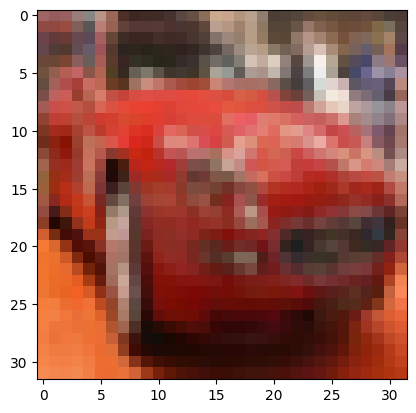

In [21]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5])

In [24]:
y_train[0]

array([6], dtype=uint8)

In [25]:
model = tf.keras.models.Sequential()

In [26]:
# Adding first CCN layer
# 1) filters (kernel) = 32
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU
# 5) input shape = (32, 32, 3)

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape = [32, 32, 3]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# Adding second CNN layer and maxpool layer
# 1) filters (kernel) = 32
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))

In [30]:
# maxpool layer parameters,
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [29]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

In [31]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

In [32]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [33]:
model.add(tf.keras.layers.Dropout(0.4))

In [34]:
model.add(tf.keras.layers.Flatten())

In [35]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [36]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 198,058 (773.66 KB)

 Trainable params: 198,058 (773.66 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

In [39]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - loss: 2.3068 - sparse_categorical_accuracy: 0.0983


In [40]:
print('Test Accuracy is: {}'.format(test_acc))

Test Accuracy is: 0.0997999981045723


In [42]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step


In [45]:
y_p = y_pred.round()

In [46]:
print(y_p[0]), print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[3]


(None, None)

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score


In [52]:
# Convert predictions to class labels using argmax
y_pred_classes = np.argmax(y_pred, axis=1)


In [53]:

# Now, compare y_pred_classes with y_test
acc_cm = accuracy_score(y_test, y_pred_classes)
print(acc_cm)

0.0998


In [54]:
cm = confusion_matrix(y_test, y_pred_classes)
print(cm)

[[  0   0   0   0 996   0   0   0   1   3]
 [  0   0   0   0 990   0   0   0   7   3]
 [  0   0   0   0 998   0   0   0   1   1]
 [  0   0   0   0 996   0   0   0   2   2]
 [  0   0   0   0 996   0   0   0   0   4]
 [  0   0   0   0 999   0   0   0   0   1]
 [  0   0   0   0 994   0   0   0   4   2]
 [  0   0   0   0 998   0   0   0   1   1]
 [  0   0   0   0 999   0   0   0   1   0]
 [  0   0   0   0 998   0   0   0   1   1]]
